In [191]:
# Initial imports
import numpy as np
import pandas as pd
import hvplot.pandas
from collections import Counter
from pathlib import Path
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from seaborn import set_style
set_style("whitegrid")

# Read the CSV and Perform Basic Data Cleaning

In [192]:
# import Final_project_NYC_BIKE_LANE_cleaned.csv data to match accident site 
file_path = "Resources/Segment2/Final_project_NYC_Bike_All_ML.csv"
ML = pd.read_csv(file_path)
print(ML.shape)
ML

(9193, 28)


,COLLISION_ID,DATES,TIME,DAY_OF_WEEK,MONTH,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,STREET,TEMP,VISIBILITY,HUMIDITY,WIND_SPEED,WEATHER_MAIN,BIKE_LANE
0,4271563,"January 2, 2020",13:00:00,Thursday,January,MANHATTAN,10003,40.714165,-74.006320,1,...,Unspecified,sedan,Bike,CHAMBERS STREET,33.94,10000.0,61,9.17,Clear,1
1,4268322,"January 2, 2020",16:00:00,Thursday,January,MANHATTAN,10012,40.725643,-73.992070,1,...,Unspecified,sedan,Bike,BOWERY,42.03,10000.0,54,9.17,Clear,1
2,4268207,"January 2, 2020",17:00:00,Thursday,January,BROOKLYN,11221,40.693874,-73.917770,1,...,Unspecified,station wagon/sport utility vehicle,Bike,CENTRAL AVENUE,44.60,10000.0,48,12.75,Rain,0
3,4268408,"January 3, 2020",8:00:00,Friday,January,BRONX,10456,40.820747,-73.906006,1,...,Unspecified,e-bike,Taxi,JACKSON AVENUE,46.78,10000.0,60,8.05,Rain,0
4,4269187,"January 3, 2020",11:00:00,Friday,January,BROOKLYN,11205,40.691017,-73.954475,1,...,Unsafe Speed,sedan,E-Bike,DE KALB AVENUE,44.92,10000.0,74,8.05,Rain,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9188,4571618,"October 9, 2022",1:00:00,Sunday,October,QUEENS,11375,40.734295,-73.850310,1,...,Unspecified,taxi,Bike,108 STREET,52.79,10000.0,53,8.05,Clear,0
9189,4571590,"October 9, 2022",6:00:00,Sunday,October,BROOKLYN,11201,40.689840,-73.978630,1,...,Unspecified,bike,Station Wagon/Sport Utility Vehicle,DE KALB AVENUE,48.74,10000.0,66,8.01,Clear,1
9190,4571393,"October 9, 2022",11:00:00,Sunday,October,BROOKLYN,11201,40.702610,-73.992516,1,...,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,bike,Bike,FRONT STREET,44.96,10000.0,74,4.61,Clear,1
9191,4571698,"October 9, 2022",12:00:00,Sunday,October,MANHATTAN,10002,40.715080,-73.992500,1,...,Unspecified,bike,Station Wagon/Sport Utility Vehicle,CANAL STREET,46.53,10000.0,72,5.75,Clear,1


In [193]:
ML.groupby(["BIKE_LANE"]).count()

,COLLISION_ID,DATES,TIME,DAY_OF_WEEK,MONTH,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,STREET,TEMP,VISIBILITY,HUMIDITY,WIND_SPEED,WEATHER_MAIN
BIKE_LANE,,,,,,,,,,,,,,,,,,,,,
0,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,...,5998,5998,5998,5998,5998,5998,5990,5998,5998,5998
1,3195,3195,3195,3195,3195,3194,3195,3195,3195,3195,...,3195,3195,3195,3195,3195,3195,3190,3195,3195,3195


In [194]:
ML.columns.tolist()

['COLLISION_ID',
 'DATES',
 'TIME',
 'DAY_OF_WEEK',
 'MONTH',
 'BOROUGH',
 'ZIP CODE',
 'LATITUDE',
 'LONGITUDE',
 'NUMBER OF PERSONS INJURED',
 'NUMBER OF PERSONS KILLED',
 'NUMBER OF PEDESTRIANS INJURED',
 'NUMBER OF PEDESTRIANS KILLED',
 'NUMBER OF CYCLIST INJURED',
 'NUMBER OF CYCLIST KILLED',
 'NUMBER OF MOTORIST INJURED',
 'NUMBER OF MOTORIST KILLED',
 'CONTRIBUTING FACTOR VEHICLE 1',
 'CONTRIBUTING FACTOR VEHICLE 2',
 'VEHICLE TYPE CODE 1',
 'VEHICLE TYPE CODE 2',
 'STREET',
 'TEMP',
 'VISIBILITY',
 'HUMIDITY',
 'WIND_SPEED',
 'WEATHER_MAIN',
 'BIKE_LANE']

In [195]:
# getting columns contains strings
df_str_columns=ML.select_dtypes(include=['object'])
for col in df_str_columns.columns:
    print(col)

DATES
TIME
DAY_OF_WEEK
MONTH
BOROUGH
CONTRIBUTING FACTOR VEHICLE 1
CONTRIBUTING FACTOR VEHICLE 2
VEHICLE TYPE CODE 1
VEHICLE TYPE CODE 2
STREET
WEATHER_MAIN


In [196]:
ML["TIME"]=ML["TIME"].astype(str)

In [197]:
ML["TIME"]= ML["TIME"].map(lambda x: x.lstrip('2022-10-25'). rstrip(' ')).map(lambda x: x.lstrip('2022-10-25'). rstrip(' '))

In [198]:
ML["DATES"] =pd.to_datetime(ML["DATES"])

In [199]:
ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9193 entries, 0 to 9192
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   COLLISION_ID                   9193 non-null   int64         
 1   DATES                          9193 non-null   datetime64[ns]
 2   TIME                           9193 non-null   object        
 3   DAY_OF_WEEK                    9193 non-null   object        
 4   MONTH                          9193 non-null   object        
 5   BOROUGH                        9192 non-null   object        
 6   ZIP CODE                       9193 non-null   int64         
 7   LATITUDE                       9193 non-null   float64       
 8   LONGITUDE                      9193 non-null   float64       
 9   NUMBER OF PERSONS INJURED      9193 non-null   int64         
 10  NUMBER OF PERSONS KILLED       9193 non-null   int64         
 11  NUMBER OF PEDESTR

# Split the Data into Training and Testing

In [200]:
# getting columns contains strings
df_str_columns=ML.select_dtypes(include=['object'])
for col in df_str_columns.columns:
    print(col)

TIME
DAY_OF_WEEK
MONTH
BOROUGH
CONTRIBUTING FACTOR VEHICLE 1
CONTRIBUTING FACTOR VEHICLE 2
VEHICLE TYPE CODE 1
VEHICLE TYPE CODE 2
STREET
WEATHER_MAIN


### tarnsform dattimes and floats to integer

In [201]:
ML["TEMP"]=ML["TEMP"].astype(int)

In [202]:
ML["HUMIDITY"]=ML["HUMIDITY"].astype(int)

In [203]:
ML["WIND_SPEED"]=ML["WIND_SPEED"].astype(int)

In [204]:
ML["VISIBILITY"]=ML["VISIBILITY"].astype(np.float).astype("Int64")

/Users/dilhumarablat/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [205]:
ML.groupby(["BIKE_LANE", "NUMBER OF PERSONS KILLED"]).count()

COLLISION_ID  DATES  TIME  DAY_OF_WEEK  \
BIKE_LANE NUMBER OF PERSONS KILLED                                           
0         0                                 5997   5997  5997         5997   
          1                                    1      1     1            1   
1         0                                 3194   3194  3194         3194   
          1                                    1      1     1            1   

                                    MONTH  BOROUGH  ZIP CODE  LATITUDE  \
BIKE_LANE NUMBER OF PERSONS KILLED                                       
0         0                          5997     5997      5997      5997   
          1                             1        1         1         1   
1         0                          3194     3193      3194      3194   
          1                             1        1         1         1   

                                    LONGITUDE  NUMBER OF PERSONS INJURED  ...  \
BIKE_LANE NUMBER OF PERSONS KILLED                                        ...   
0         0                              5997                       5997  ...   
          1                                 1                          1  ...   
1         0                              3194                       3194  ...   
          1                                 1                          1  ...   

                                    CONTRIBUTING FACTOR VEHICLE 1  \
BIKE_LANE NUMBER OF PERSONS KILLED                                  
0         0                                                  5997   
          1                                                     1   
1         0                                                  3194   
          1                                                     1   

                                    CONTRIBUTING FACTOR VEHICLE 2  \
BIKE_LANE NUMBER OF PERSONS KILLED                                  
0         0                                                  5997   
          1                                                     1   
1         0                                                  3194   
          1                                                     1   

                                    VEHICLE TYPE CODE 1  VEHICLE TYPE CODE 2  \
BIKE_LANE NUMBER OF PERSONS KILLED                                             
0         0                                        5997                 5997   
          1                                           1                    1   
1         0                                        3194                 3194   
          1                                           1                    1   

                                    STREET  TEMP  VISIBILITY  HUMIDITY  \
BIKE_LANE NUMBER OF PERSONS KILLED                                       
0         0                           5997  5997        5989      5997   
          1                              1     1           1         1   
1         0                           3194  3194        3189      3194   
          1                              1     1           1         1   

                                    WIND_SPEED  WEATHER_MAIN  
BIKE_LANE NUMBER OF PERSONS KILLED                            
0         0                               5997          5997  
          1                                  1             1  
1         0                               3194          3194  
          1                                  1             1  

[4 rows x 26 columns]

In [141]:
ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9193 entries, 0 to 9192
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   COLLISION_ID                   9193 non-null   int64         
 1   DATES                          9193 non-null   datetime64[ns]
 2   TIME                           9193 non-null   object        
 3   DAY_OF_WEEK                    9193 non-null   object        
 4   MONTH                          9193 non-null   object        
 5   BOROUGH                        9192 non-null   object        
 6   ZIP CODE                       9193 non-null   int64         
 7   LATITUDE                       9193 non-null   float64       
 8   LONGITUDE                      9193 non-null   float64       
 9   NUMBER OF PERSONS INJURED      9193 non-null   int64         
 10  NUMBER OF PERSONS KILLED       9193 non-null   int64         
 11  NUMBER OF PEDESTR

In [206]:
# using lableEncoder to assign months into numerical values 
le = LabelEncoder()
ML1 = ML.copy()
ML1['MONTH'] = le.fit_transform(ML1['MONTH'])

In [207]:
# Create our features and get dummies
X = pd.get_dummies(ML1, columns= ["TIME", "VISIBILITY", "DAY_OF_WEEK","BOROUGH", 
                                 "WEATHER_MAIN", "NUMBER OF PERSONS INJURED",'NUMBER OF PERSONS KILLED', "CONTRIBUTING FACTOR VEHICLE 1", 
                                "VEHICLE TYPE CODE 1", "VEHICLE TYPE CODE 2"]).drop(["COLLISION_ID","LATITUDE","LONGITUDE", "STREET", "BIKE_LANE", "CONTRIBUTING FACTOR VEHICLE 2", 
                                                  'NUMBER OF CYCLIST INJURED','NUMBER OF CYCLIST KILLED',
                                                   'NUMBER OF MOTORIST INJURED','NUMBER OF MOTORIST KILLED', 
                                                   "NUMBER OF PEDESTRIANS INJURED", "NUMBER OF PEDESTRIANS KILLED", "DATES"],axis=1)

# Create our target
y = ML1['BIKE_LANE']
X.head()

,MONTH,ZIP CODE,TEMP,HUMIDITY,WIND_SPEED,TIME_3:00:00,TIME_4:00:00,TIME_6:00:00,TIME_7:00:00,TIME_8:00:00,...,VEHICLE TYPE CODE 2_School Bus,VEHICLE TYPE CODE 2_Scooter,VEHICLE TYPE CODE 2_Sedan,VEHICLE TYPE CODE 2_Self insur,VEHICLE TYPE CODE 2_Station Wagon/Sport Utility Vehicle,VEHICLE TYPE CODE 2_Tanker,VEHICLE TYPE CODE 2_Taxi,VEHICLE TYPE CODE 2_Tractor Truck Diesel,VEHICLE TYPE CODE 2_Van,VEHICLE TYPE CODE 2_van
0,4,10003,33,61,9,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,10012,42,54,9,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,11221,44,48,12,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,10456,46,60,8,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,4,11205,44,74,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [208]:
X.describe()

,MONTH,ZIP CODE,TEMP,HUMIDITY,WIND_SPEED,TIME_3:00:00,TIME_4:00:00,TIME_6:00:00,TIME_7:00:00,TIME_8:00:00,...,VEHICLE TYPE CODE 2_School Bus,VEHICLE TYPE CODE 2_Scooter,VEHICLE TYPE CODE 2_Sedan,VEHICLE TYPE CODE 2_Self insur,VEHICLE TYPE CODE 2_Station Wagon/Sport Utility Vehicle,VEHICLE TYPE CODE 2_Tanker,VEHICLE TYPE CODE 2_Taxi,VEHICLE TYPE CODE 2_Tractor Truck Diesel,VEHICLE TYPE CODE 2_Van,VEHICLE TYPE CODE 2_van
count,9193.000000,9193.000000,9193.000000,9193.000000,9193.000000,9193.000000,9193.000000,9193.00000,9193.000000,9193.000000,...,9193.000000,9193.000000,9193.000000,9193.000000,9193.000000,9193.000000,9193.000000,9193.000000,9193.000000,9193.000000
mean,5.907973,10806.107691,64.124551,60.826172,12.162080,0.098336,0.069074,0.08996,0.111389,0.117916,...,0.000109,0.000218,0.075275,0.000109,0.055695,0.000109,0.006309,0.000435,0.001088,0.000109
std,3.505034,558.595380,16.270232,17.393948,5.534964,0.297784,0.253594,0.28614,0.314630,0.322526,...,0.010430,0.014749,0.263848,0.010430,0.229343,0.010430,0.079183,0.020856,0.032965,0.010430
min,0.000000,10000.000000,14.000000,10.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,10036.000000,52.000000,47.000000,8.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,11205.000000,67.000000,60.000000,11.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,11228.000000,77.000000,75.000000,15.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11.000000,11694.000000,97.000000,98.000000,45.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [209]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9193 entries, 0 to 9192
Columns: 186 entries, MONTH to VEHICLE TYPE CODE 2_van
dtypes: int64(5), uint8(181)
memory usage: 1.9 MB


In [210]:
# Check the balance of our target values
y.value_counts()

0    5998
1    3195
Name: BIKE_LANE, dtype: int64

In [211]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [212]:
# Check balances
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 4533, 1: 2361})
Counter({0: 1465, 1: 834})


# Ensemble Learners

In this section, we will compare two ensemble algorithms to determine which algorithm results in the best performance. You will train a Balanced Random Forest Classifier and an Easy Ensemble AdaBoost classifier . For each algorithm, be sure to complete the folliowing steps:

Train the model using the training data.
Calculate the balanced accuracy score from sklearn.metrics.
Print the confusion matrix from sklearn.metrics.
Generate a classication report using the imbalanced_classification_report from imbalanced-learn.
For the Balanced Random Forest Classifier onely, print the feature importance sorted in descending order (most important feature to least important) along with the feature score
Note: Use a random state of 1 for each algorithm to ensure consistency between tests

### Balanced Random Forest Classifier

In [213]:
# Resample the training data with the BalancedRandomForestClassifier
# get time for execustion
from datetime import datetime
start_time = datetime.now()

from imblearn.ensemble import BalancedRandomForestClassifier
BalancedRFC_model = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
BalancedRFC_model= BalancedRFC_model.fit(X_train, y_train)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:00.743089


In [214]:
# Calculated the balanced accuracy score
y_pred = BalancedRFC_model.predict(X_test)
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.7840011949484781

In [215]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[999, 466],
       [ 95, 739]])

In [216]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.91      0.68      0.89      0.78      0.78      0.59      1465
          1       0.61      0.89      0.68      0.72      0.78      0.62       834

avg / total       0.80      0.76      0.81      0.76      0.78      0.60      2299



In [217]:
# List the features 
features = BalancedRFC_model.feature_importances_
features

array([4.98580176e-02, 2.08569109e-01, 6.83330322e-02, 7.08908498e-02,
       5.87539250e-02, 7.38400163e-03, 6.53887714e-03, 7.43861130e-03,
       8.53953397e-03, 8.84001390e-03, 8.50773486e-03, 1.40719975e-02,
       1.69232642e-04, 1.07785067e-04, 3.19795057e-04, 1.14213955e-04,
       5.00688076e-05, 1.17958822e-04, 2.74542461e-04, 4.98239336e-04,
       3.41908207e-04, 7.24866640e-04, 5.91926996e-04, 9.68917055e-04,
       1.22099220e-03, 2.84743752e-03, 1.03801613e-02, 8.86434937e-03,
       9.43545546e-03, 9.26707361e-03, 9.89050495e-03, 1.00705642e-02,
       9.56769623e-03, 5.14594116e-02, 6.02244992e-02, 1.87072706e-02,
       4.63101989e-02, 4.23220124e-03, 1.36825909e-02, 1.23555008e-02,
       1.94457276e-04, 1.86769668e-04, 1.47017364e-03, 3.50783616e-03,
       9.60115485e-03, 8.62498296e-04, 8.67986702e-04, 1.15486916e-03,
       3.03799206e-03, 2.90026793e-03, 4.94865530e-04, 4.60758491e-05,
       1.10030969e-05, 5.12317004e-05, 0.00000000e+00, 8.13894108e-05,
      

In [218]:
# sorted in descending order by feature importance
ranked_features = sorted(zip(features, X.columns), reverse=True)
for feature in ranked_features:
    print(f"{feature[1]}: ({feature[0]})")

ZIP CODE: (0.20856910921724547)
HUMIDITY: (0.07089084980167579)
TEMP: (0.06833303224790511)
BOROUGH_BROOKLYN: (0.06022449917483556)
WIND_SPEED: (0.05875392500685535)
BOROUGH_BRONX: (0.05145941156409526)
MONTH: (0.04985801762218185)
BOROUGH_QUEENS: (0.04631019889603889)
BOROUGH_MANHATTAN: (0.01870727057991402)
TIME_:00:00: (0.014071997465819417)
WEATHER_MAIN_Clear: (0.013682590909096798)
VEHICLE TYPE CODE 1_sedan: (0.01317209081140033)
VEHICLE TYPE CODE 1_station wagon/sport utility vehicle: (0.012540301343431369)
WEATHER_MAIN_Clouds: (0.012355500756049093)
CONTRIBUTING FACTOR VEHICLE 1_Driver Inattention/Distraction: (0.012011761917742534)
VEHICLE TYPE CODE 2_Bike: (0.01116814946521119)
DAY_OF_WEEK_Friday: (0.010380161294278737)
CONTRIBUTING FACTOR VEHICLE 1_Failure to Yield Right-of-Way: (0.010310227173306317)
DAY_OF_WEEK_Tuesday: (0.010070564206264366)
CONTRIBUTING FACTOR VEHICLE 1_Unspecified: (0.010053535383538217)
DAY_OF_WEEK_Thursday: (0.009890504952750316)
WEATHER_MAIN_Rain: (0.

In [219]:
# Resample the training data with the BalancedRandomForestClassifier with 500 iterations
# get time for execustion
from datetime import datetime
start_time = datetime.now()

from imblearn.ensemble import BalancedRandomForestClassifier
BalancedRFC_model = BalancedRandomForestClassifier(n_estimators=500, random_state=1)
BalancedRFC_model= BalancedRFC_model.fit(X_train, y_train)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:03.480386


In [220]:
# Calculated the balanced accuracy score
y_pred = BalancedRFC_model.predict(X_test)
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.7834196806377424

In [221]:
# 500 iteration is not good as 100 iteration either,so in order to imporve th performance we used Adaboost classifier

# Easy Ensemble AdaBoost Classifier

In [222]:
# Train the EasyEnsembleClassifier

start_time = datetime.now()

from imblearn.ensemble import EasyEnsembleClassifier 
easyEnsemble_model = EasyEnsembleClassifier(n_estimators=100, random_state=1)
easyEnsemble_model= easyEnsemble_model.fit(X_train, y_train)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:27.731405


In [223]:
# Calculated the balanced accuracy score
y_pred = easyEnsemble_model.predict(X_test)
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.8030397524983426

In [224]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1046,  419],
       [  90,  744]])

In [225]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.71      0.89      0.80      0.80      0.63      1465
          1       0.64      0.89      0.71      0.75      0.80      0.65       834

avg / total       0.82      0.78      0.83      0.78      0.80      0.63      2299



In [226]:
# use 500 iterations and getting time for execustion

start_time = datetime.now()

easyEnsemble_model = EasyEnsembleClassifier(n_estimators=500, random_state=1)
easyEnsemble_model= easyEnsemble_model.fit(X_train, y_train)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:02:16.693561


In [227]:
# Calculated the balanced accuracy score
y_pred = easyEnsemble_model.predict(X_test)
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.8050134636318249

In [228]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1043,  422],
       [  85,  749]])

In [229]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.71      0.90      0.80      0.80      0.63      1465
          1       0.64      0.90      0.71      0.75      0.80      0.65       834

avg / total       0.82      0.78      0.83      0.78      0.80      0.64      2299



In [230]:
# using 1000 iterations and getting execution time

start_time = datetime.now()

easyEnsemble_model = EasyEnsembleClassifier(n_estimators=1000, random_state=1)
easyEnsemble_model= easyEnsemble_model.fit(X_train, y_train)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:04:30.860911


In [231]:
# Calculated the balanced accuracy score
y_pred = easyEnsemble_model.predict(X_test)
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.8036392728820356

In [232]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1046,  419],
       [  89,  745]])

In [233]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.71      0.89      0.80      0.80      0.63      1465
          1       0.64      0.89      0.71      0.75      0.80      0.65       834

avg / total       0.82      0.78      0.83      0.78      0.80      0.63      2299



#### Make real meaning to the model rather than just predicting Bike lane, we are trying to see the features to calssify safer or not safe if cyclist riding on bike lane or not 

In [234]:
# doing some EDA here 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

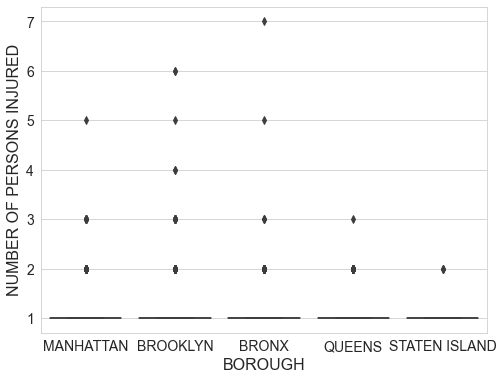

In [239]:
## violinplot for BROUGHS and number of persons injured
plt.figure(figsize=(8,6))

sns.boxplot(data = ML,
               y = 'NUMBER OF PERSONS INJURED',
               x = 'BOROUGH')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.ylabel("NUMBER OF PERSONS INJURED", fontsize=16)
plt.xlabel("BOROUGH", fontsize=16)

plt.show()

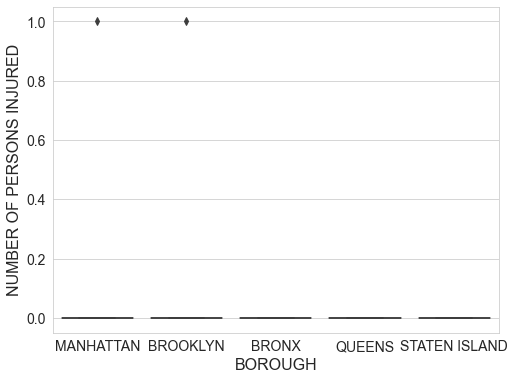

In [257]:
## violinplot for BROUGHS and number of persons injured
plt.figure(figsize=(8,6))

sns.boxplot(data = ML,
               y = 'NUMBER OF PERSONS KILLED',
               x = 'BOROUGH')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.ylabel("NUMBER OF PERSONS INJURED", fontsize=16)
plt.xlabel("BOROUGH", fontsize=16)

plt.show()

In [240]:
ML1=ML.groupby(["BIKE_LANE", "BOROUGH",]).count()

In [241]:
ML1

COLLISION_ID  DATES  TIME  DAY_OF_WEEK  MONTH  \
BIKE_LANE BOROUGH                                                        
0         BRONX                  1056   1056  1056         1056   1056   
          BROOKLYN               1737   1737  1737         1737   1737   
          MANHATTAN              1531   1531  1531         1531   1531   
          QUEENS                 1603   1603  1603         1603   1603   
          STATEN ISLAND            71     71    71           71     71   
1         BRONX                     1      1     1            1      1   
          BROOKLYN               1936   1936  1936         1936   1936   
          MANHATTAN              1038   1038  1038         1038   1038   
          QUEENS                  157    157   157          157    157   
          STATEN ISLAND            62     62    62           62     62   

                         ZIP CODE  LATITUDE  LONGITUDE  \
BIKE_LANE BOROUGH                                        
0         BRONX              1056      1056       1056   
          BROOKLYN           1737      1737       1737   
          MANHATTAN          1531      1531       1531   
          QUEENS             1603      1603       1603   
          STATEN ISLAND        71        71         71   
1         BRONX                 1         1          1   
          BROOKLYN           1936      1936       1936   
          MANHATTAN          1038      1038       1038   
          QUEENS              157       157        157   
          STATEN ISLAND        62        62         62   

                         NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  \
BIKE_LANE BOROUGH                                                              
0         BRONX                               1056                      1056   
          BROOKLYN                            1737                      1737   
          MANHATTAN                           1531                      1531   
          QUEENS                              1603                      1603   
          STATEN ISLAND                         71                        71   
1         BRONX                                  1                         1   
          BROOKLYN                            1936                      1936   
          MANHATTAN                           1038                      1038   
          QUEENS                               157                       157   
          STATEN ISLAND                         62                        62   

                         ...  CONTRIBUTING FACTOR VEHICLE 1  \
BIKE_LANE BOROUGH        ...                                  
0         BRONX          ...                           1056   
          BROOKLYN       ...                           1737   
          MANHATTAN      ...                           1531   
          QUEENS         ...                           1603   
          STATEN ISLAND  ...                             71   
1         BRONX          ...                              1   
          BROOKLYN       ...                           1936   
          MANHATTAN      ...                           1038   
          QUEENS         ...                            157   
          STATEN ISLAND  ...                             62   

                         CONTRIBUTING FACTOR VEHICLE 2  VEHICLE TYPE CODE 1  \
BIKE_LANE BOROUGH                                                             
0         BRONX                                   1056                 1056   
          BROOKLYN                                1737                 1737   
          MANHATTAN                               1531                 1531   
          QUEENS                                  1603                 1603   
          STATEN ISLAND                             71                   71   
1         BRONX                                      1                    1   
          BROOKLYN                                1936                 1936   
          

In [245]:
ML2=ML1.reset_index()

In [246]:
ML2

,BIKE_LANE,BOROUGH,COLLISION_ID,DATES,TIME,DAY_OF_WEEK,MONTH,ZIP CODE,LATITUDE,LONGITUDE,...,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,STREET,TEMP,VISIBILITY,HUMIDITY,WIND_SPEED,WEATHER_MAIN
0,0,BRONX,1056,1056,1056,1056,1056,1056,1056,1056,...,1056,1056,1056,1056,1056,1056,1054,1056,1056,1056
1,0,BROOKLYN,1737,1737,1737,1737,1737,1737,1737,1737,...,1737,1737,1737,1737,1737,1737,1735,1737,1737,1737
2,0,MANHATTAN,1531,1531,1531,1531,1531,1531,1531,1531,...,1531,1531,1531,1531,1531,1531,1530,1531,1531,1531
3,0,QUEENS,1603,1603,1603,1603,1603,1603,1603,1603,...,1603,1603,1603,1603,1603,1603,1600,1603,1603,1603
4,0,STATEN ISLAND,71,71,71,71,71,71,71,71,...,71,71,71,71,71,71,71,71,71,71
5,1,BRONX,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,1,BROOKLYN,1936,1936,1936,1936,1936,1936,1936,1936,...,1936,1936,1936,1936,1936,1936,1932,1936,1936,1936
7,1,MANHATTAN,1038,1038,1038,1038,1038,1038,1038,1038,...,1038,1038,1038,1038,1038,1038,1037,1038,1038,1038
8,1,QUEENS,157,157,157,157,157,157,157,157,...,157,157,157,157,157,157,157,157,157,157
9,1,STATEN ISLAND,62,62,62,62,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62


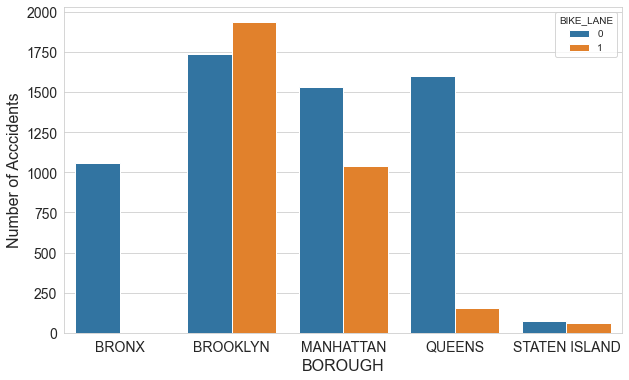

In [256]:
## violinplot for BOROUGHS and BIKE_LANE
plt.figure(figsize=(10,6))

sns.barplot(data = ML2,
               y = 'COLLISION_ID',
               x = 'BOROUGH',
               hue="BIKE_LANE")

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.ylabel('Number of Acccidents', fontsize=16)
plt.xlabel('BOROUGH', fontsize=16)

plt.show()

In [114]:
ML3=ML.groupby(["BIKE_LANE"]).count()

,COLLISION_ID,DATES,TIME,DAY_OF_WEEK,MONTH,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,STREET,TEMP,VISIBILITY,HUMIDITY,WIND_SPEED,WEATHER_MAIN
BIKE_LANE,,,,,,,,,,,,,,,,,,,,,
0,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,...,5998,5998,5998,5998,5998,5998,5990,5998,5998,5998
1,3195,3195,3195,3195,3195,3194,3195,3195,3195,3195,...,3195,3195,3195,3195,3195,3195,3190,3195,3195,3195
